In [9]:
import numpy as np
import pandas as pd
from scipy import stats
features = pd.read_csv("C:/car.data")

In [10]:
features

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [11]:
data=pd.DataFrame(data=features)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
target=data.columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
for i in target:
   data[i]=le.fit_transform(data[i])

In [15]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


<AxesSubplot:xlabel='unacc', ylabel='count'>

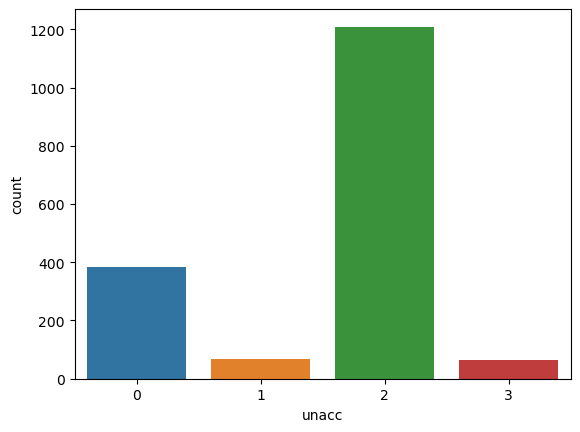

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data,x=data["unacc"])

In [19]:
X = data.iloc[:,0:6].values
y = data.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [20]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [21]:
X

array([[3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


C:\Users\tompo\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 0s 4ms/step - loss: 0.7322 - accuracy: 0.7306 - val_loss: 0.6329 - val_accuracy: 0.7254
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 0.5938 - accuracy: 0.7531 - val_loss: 0.6626 - val_accuracy: 0.7254
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 0.5491 - accuracy: 0.7690 - val_loss: 0.5762 - val_accuracy: 0.7283
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7936 - val_loss: 0.4968 - val_accuracy: 0.7775
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8182 - val_loss: 0.4816 - val_accuracy: 0.8035
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8255 - val_loss: 0.4285 - val_accuracy: 0.8208
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8233 - val_loss: 0.4055 - val_accuracy: 0.8179
Epoch 8/100
4

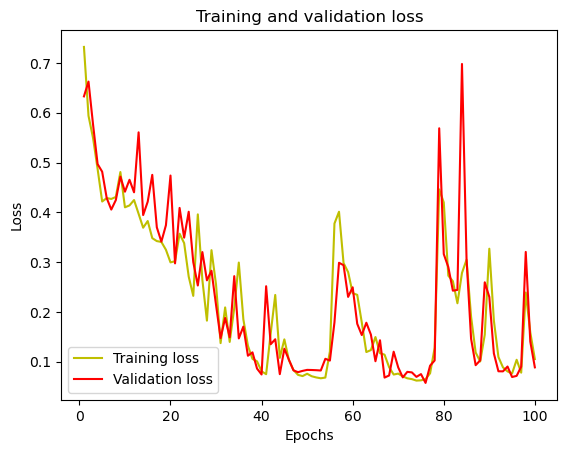

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
Y